In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5851502118843848537, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7181815356482273175
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6813259755552353184
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695488000
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7368019681836464843
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout,GlobalMaxPool1D,Embedding,Conv1D,Flatten
tf.random.set_seed(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
real = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fake_And_Real_News/True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fake_And_Real_News/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
real['target'] = 1
fake['target'] = 0
df = pd.concat([real,fake])
df.drop(['text','subject','date'],axis=1,inplace=True)
df.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [8]:
df['target'].value_counts()

0    23481
1    21417
Name: target, dtype: int64

In [9]:
text=[]
for i in range(len(df)):
    sample=re.sub('[^a-zA-Z]',' ',df['title'].iloc[i])
    sample=sample.lower()
    sample=sample.split()
    sample=' '.join(sample)
    text.append(sample)
text[:20]

['as u s budget fight looms republicans flip their fiscal script',
 'u s military to accept transgender recruits on monday pentagon',
 'senior u s republican senator let mr mueller do his job',
 'fbi russia probe helped by australian diplomat tip off nyt',
 'trump wants postal service to charge much more for amazon shipments',
 'white house congress prepare for talks on spending immigration',
 'trump says russia probe will be fair but timeline unclear nyt',
 'factbox trump on twitter dec approval rating amazon',
 'trump on twitter dec global warming',
 'alabama official to certify senator elect jones today despite challenge cnn',
 'jones certified u s senate winner despite moore challenge',
 'new york governor questions the constitutionality of federal tax overhaul',
 'factbox trump on twitter dec vanity fair hillary clinton',
 'trump on twitter dec trump iraq syria',
 'man says he delivered manure to mnuchin to protest new u s tax law',
 'virginia officials postpone lottery drawing to

In [10]:
X = text
y=df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [12]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index)+1

In [13]:
X_train = sequence.pad_sequences(X_train, maxlen=20,padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=20,padding='post')

In [14]:
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=20))
model.add(Conv1D(512,3,padding='same',activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [15]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size=64, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8
632/632 [==============================] - 12s 19ms/step - loss: 0.3240 - accuracy: 0.8495 - val_loss: 0.1347 - val_accuracy: 0.9459
Epoch 2/8
632/632 [==============================] - 13s 20ms/step - loss: 0.0983 - accuracy: 0.9650 - val_loss: 0.1005 - val_accuracy: 0.9639
Epoch 3/8
632/632 [==============================] - 12s 19ms/step - loss: 0.0594 - accuracy: 0.9800 - val_loss: 0.0916 - val_accuracy: 0.9670
Epoch 4/8
632/632 [==============================] - 12s 19ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0878 - val_accuracy: 0.9708
Epoch 5/8
632/632 [==============================] - 12s 19ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0944 - val_accuracy: 0.9695
Epoch 6/8
632/632 [==============================] - 12s 19ms/step - loss: 0.0149 - accuracy: 0.9961 - val_loss: 0.1006 - val_accuracy: 0.9708
Epoch 7/8
632/632 [==============================] - 12s 19ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.1092 - val_accuracy: 0.9717

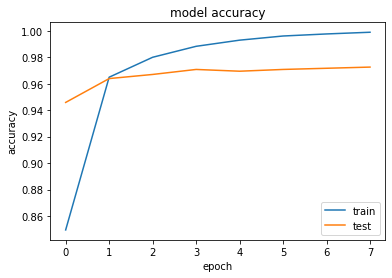

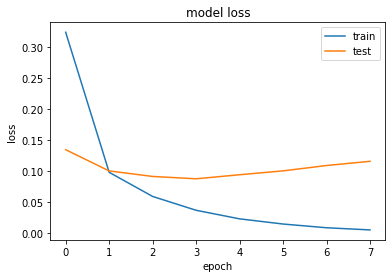

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [19]:
97.26

97.26